# Grays Harbor Tides with Sine Boundary Condition

First run the GeoClaw code and then use this notebook to examine the gauge results.

The tidal signal is $\sin(2\pi t / T)$ implemented on the left boundary, a pure sine wave with amplitude 1 and period $T = 12\times 3600 = $ 12 hours

In [1]:
%matplotlib inline

In [2]:
from pylab import *

In [3]:
from IPython.display import Image
import clawpack.pyclaw.gauges as gauges

At gauge 0, etamin2 = -0.853, etamax2 = 0.855 at tshift = 1232.6 s
At gauge 1102, etamin2 = -0.916, etamax2 = 0.962 at tshift = 3219.8 s
At gauge 1187, etamin2 = -1.031, etamax2 = 1.125 at tshift = 4397.7 s


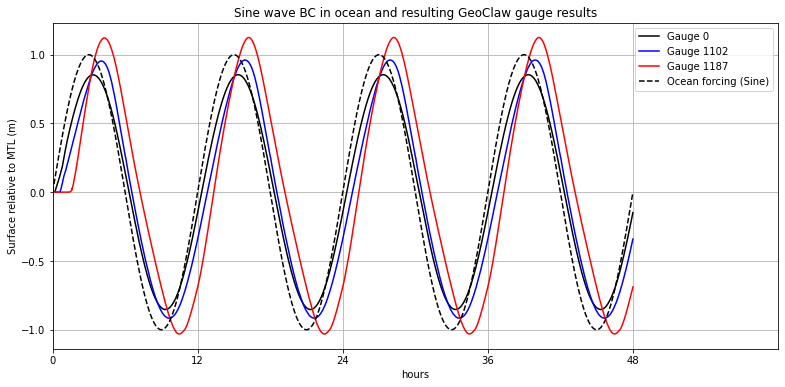

In [4]:
figure(400, figsize=(13,6))
clf()
colors = ['k','b','r']

outdir = '_output'

for k,gaugeno in enumerate([0,1102,1187]):
    gauge = gauges.GaugeSolution(gaugeno, outdir)
    t = gauge.t / 3600.   # convert to hours
    q = gauge.q
    eta = q[3,:]
    plot(t, eta, colors[k], label='Gauge %s' % gaugeno)

    # determine amplification and time shift:
    m2 = int(floor(0.75*len(eta)))
    eta2 = eta[m2:]  # last part of eta signal
    etamax2 = eta2.max()
    etamin2 = eta2.min()
    t2 = t[m2:]
    jtmax = argmax(eta2) 
    tshift = (t2[jtmax] - 39.)*3600.
    
    print('At gauge %i, etamin2 = %.3f, etamax2 = %.3f at tshift = %.1f s' \
            % (gaugeno,etamin2,etamax2,tshift))

tperiod = 12
eta = 1.*sin(2*pi*t/tperiod)
plot(t, eta, 'k--', label='Ocean forcing (Sine)')

legend(loc='upper right')
xlabel('hours')
ylabel('Surface relative to MTL (m)')
grid(True)
title('Sine wave BC in ocean and resulting GeoClaw gauge results');

xticks(arange(0,t[-1]+0.1,12))
xlim(0,60)

if 0:
    fname = 'GaugeComparison.png'
    savefig(fname, bbox_inches='tight')
    print('Created %s' % fname)   

## Notes:

- Given an observed tide at Westport that we want to match, we can shift it by about 3220 seconds and increase it by a factor 1.04 in order to obtain the signal to use at the left boundary.  This is illustrated in the example `../grays_kingtide2015`.


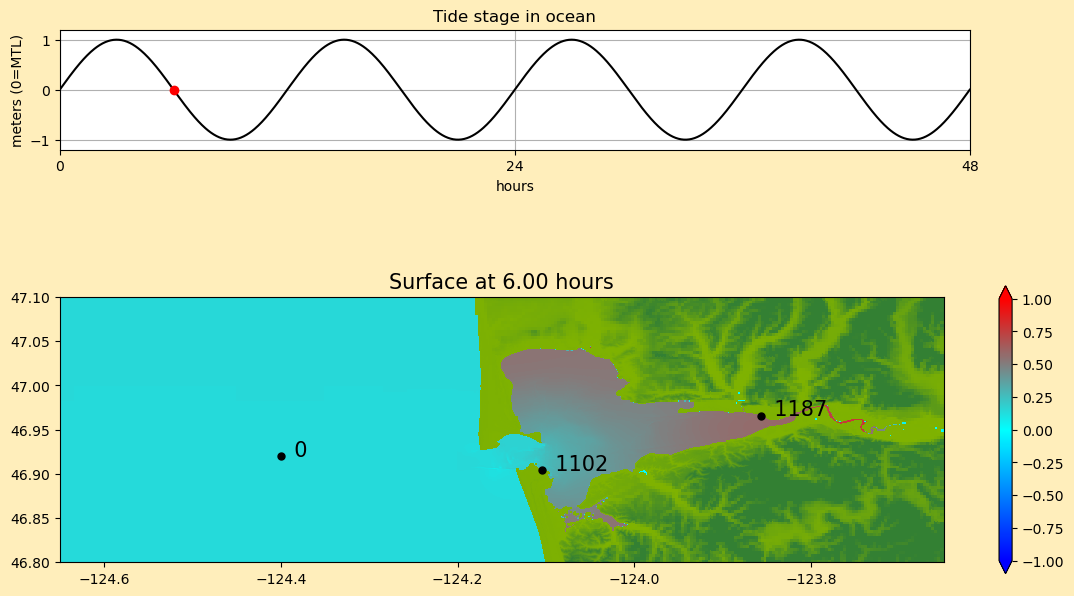

In [5]:
Image('frame0006fig50.png', width=800)